## Data PFF



In [ ]:
import pandas as pd

In [ ]:
# Uncomment if you're using google drive for storage

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/My Drive/data/COR_CRU_1T.jsonl"

In [ ]:
df = pd.read_json(file_path, lines=True)

In [ ]:
df.head()

,version,gameRefId,generatedTime,videoTimeMs,frameNum,period,periodElapsedTime,periodGameClockTime,homePlayers,homePlayersSmoothed,awayPlayers,awayPlayersSmoothed,balls,ballsSmoothed,sequence,home_ball,game_event_id,possession_event_id,game_event,possession_event
0,4.1.0,12501,2023-05-04T15:45:52.964339Z,3069.736,92,1,0.000000,0.000000,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'visibility': 'VISIBLE', 'x': -1.82, 'y': 1....","{'visibility': 'VISIBLE', 'x': -0.135, 'y': -1...",1.0,1.0,9544146.0,9510088.0,"{'game_id': 12501, 'game_event_type': '1KO', '...","{'game_id': 12501, 'game_event_id': 9544146, '..."
1,4.1.0,12501,2023-05-04T15:45:52.964339Z,3103.103,93,1,0.033103,0.033103,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'visibility': 'VISIBLE', 'x': -2.27, 'y': 1....","{'visibility': 'VISIBLE', 'x': -0.627, 'y': -1...",1.0,1.0,NaN,NaN,None,None
2,4.1.0,12501,2023-05-04T15:45:52.964339Z,3136.470,94,1,0.066470,0.066470,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'visibility': 'VISIBLE', 'x': -2.27, 'y': 1....","{'visibility': 'VISIBLE', 'x': -1.119, 'y': -1...",1.0,1.0,NaN,NaN,None,None
3,4.1.0,12501,2023-05-04T15:45:52.964339Z,3169.837,95,1,0.099837,0.099837,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'visibility': 'VISIBLE', 'x': -2.92, 'y': 1....","{'visibility': 'VISIBLE', 'x': -1.611, 'y': -1...",1.0,1.0,NaN,NaN,None,None
4,4.1.0,12501,2023-05-04T15:45:52.964339Z,3203.203,96,1,0.133203,0.133203,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'jerseyNum': '3', 'confidence': 'LOW', 'visi...","[{'visibility': 'VISIBLE', 'x': -2.92, 'y': 1....","{'visibility': 'VISIBLE', 'x': -2.103, 'y': -1...",1.0,1.0,NaN,NaN,None,None


### PFF to metrica

In [ ]:
def extract_home_player_coordinates(row):
    player_dict = {}
    players = row['homePlayersSmoothed']
    if players is None:
      return None
    for player in players:
        key = f"Player{player['jerseyNum']}_"
        player_dict[key + 'x'] = player['x']
        player_dict[key + 'y'] = player['y']
    return player_dict

In [ ]:
df['home_player_coordinates'] = df.apply(extract_home_player_coordinates, axis=1)

In [ ]:
def extract_away_player_coordinates(row):
    player_dict = {}
    players = row['awayPlayersSmoothed']
    if players is None:
      return None
    for player in players:
        key = f"Player{player['jerseyNum']}_"
        player_dict[key + 'x'] = player['x']
        player_dict[key + 'y'] = player['y']
    return player_dict

In [ ]:
df['away_player_coordinates'] = df.apply(extract_away_player_coordinates, axis=1)

In [ ]:
def extract_ball_coordinates(row):
    ball_dict = {}
    if len(row['balls']) > 0:
      ball = row['balls'][0]
    else:
      return None
    ball_dict['Ball_x'] = ball['x']
    ball_dict['Ball_y'] = ball['y']
    return ball_dict

In [ ]:
df['ball_coordinates'] = df.apply(extract_ball_coordinates, axis=1)

In [ ]:
df = df[df['home_player_coordinates'].notna()]
df = df[df['away_player_coordinates'].notna()]
df = df[df['ball_coordinates'].notna()]

In [ ]:
home_team = pd.DataFrame(df['home_player_coordinates'].tolist())
home_team['Ball_x'] = df['ball_coordinates'].apply(lambda x: x['Ball_x'])
home_team['Ball_y'] = df['ball_coordinates'].apply(lambda x: x['Ball_y'])
home_team['Period'] = df['period']
home_team['Frame'] = df['frameNum']
home_team['Time'] = df['periodElapsedTime']

In [ ]:
# home_team

In [ ]:
away_team = pd.DataFrame(df['away_player_coordinates'].tolist())
away_team['Ball_x'] = df['ball_coordinates'].apply(lambda x: x['Ball_x'])
away_team['Ball_y'] = df['ball_coordinates'].apply(lambda x: x['Ball_y'])
away_team['Period'] = df['period']
away_team['Frame'] = df['frameNum']
away_team['Time'] = df['periodElapsedTime']

In [ ]:
# away_team

## Gauss-Legendre version

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.nn.functional import softplus

## set GPU or CPU (uncomment second line to use CPU)
device = torch.device('cuda:0'); dtype = torch.float16
#device = 'cpu'; dtype = torch.float32

import time
tic = time.time()

### load the data and process it
tic_load = time.time()
# away_data = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv', skiprows=2)
away_data = away_team
# home_data = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv', skiprows=2)
home_data = home_team
toc_load = time.time()

tic_process = time.time()
jitter = 1e-12 ## prevents division by zero when player is stationary

# unique player num
all_players_home = list(set([col.split("_")[0] for col in home_team.columns if col not in ["Ball_x","Ball_y","Period","Frame","Time"]]))
all_players_away = list(set([col.split("_")[0] for col in away_team.columns if col not in ["Ball_x","Ball_y","Period","Frame","Time"]]))

# for each player, multiply x and y
home_pos = [np.asarray([home_team[col+"_x"]+(105/2),home_team[col+"_y"]+(68/2)]) for i, col in enumerate(all_players_home)]
home_pos = np.array(home_pos).transpose(0, 2, 1)
## set nans to large negative value -- this makes pitch control for players who aren't involved negligibly small everywhere on the pitch
np.nan_to_num(home_pos,copy=False,nan=-1000)

away_pos = [np.asarray([away_team[col+"_x"]+(105/2),away_team[col+"_y"]+(68/2)]) for i, col in enumerate(all_players_away)]
away_pos = np.array(away_pos).transpose(0, 2, 1)
## set nans to large negative value -- this makes pitch control for players who aren't involved negligibly small everywhere on the pitch
np.nan_to_num(away_pos,copy=False,nan=-1000)

ball_pos = (np.asarray(home_data[["Ball_x","Ball_y"]]) + np.array([105/2,68/2]))[:,None,None,:]

tt = np.asarray(home_data['Time'])
dt = tt[1:] - tt[:-1]

home_v = (home_pos[:,1:,:] - home_pos[:,:-1,:])/dt[:,None] + jitter
np.nan_to_num(home_v,copy=False,nan=-1000)

away_v = (away_pos[:,1:,:] - away_pos[:,:-1,:])/dt[:,None] + jitter
np.nan_to_num(away_v,copy=False,nan=-1000)

home_pos = home_pos[:,1:,None,None,:]
away_pos = away_pos[:,1:,None,None,:]

home_v = home_v[:,:,None,None,:]
away_v = away_v[:,:,None,None,:]

ball_pos = ball_pos[None,1:]

toc_process = time.time()

tic_setup = time.time()

## set up evaluation grid and set some pitch control parameters (these are taken from the FoT code)
reaction_time = 0.7
max_player_speed = 5.
average_ball_speed = 15.
sigma = np.pi / np.sqrt(3.) / 0.45
lamb = 4.3

n_grid_points_x = 50
n_grid_points_y = 30

XX,YY = torch.meshgrid(torch.linspace(0,105,n_grid_points_x,device=device,dtype=dtype),torch.linspace(0,68,n_grid_points_y,device=device,dtype=dtype))
ti,wi = np.polynomial.legendre.leggauss(50) ## used for numerical integration later on

ti = torch.tensor(ti,device = device,dtype=dtype)
wi = torch.tensor(wi,device=device,dtype=dtype)

target_position = torch.stack([XX,YY],2)[None,None,:,:,:]

n_frames = home_pos.shape[1]

first_frame = 0
batch_size = 100

tti = torch.empty([len(all_players_home)+len(all_players_away),batch_size,n_grid_points_x,n_grid_points_y],device = device,dtype=dtype)
tmp2 = torch.empty([len(all_players_home)+len(all_players_away),batch_size,n_grid_points_x,n_grid_points_y,1],device = device,dtype=dtype)

pc = torch.empty([n_frames,n_grid_points_x,n_grid_points_y],device = device,dtype=dtype)

toc_setup = time.time()

## compute pitch control -- I found that the batch size needed to be reduced to 250 when using the CPU
tic_loop = time.time()

for f in range(int(n_frames/batch_size)):
  bp = torch.tensor(ball_pos[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)

  hp = torch.tensor(home_pos[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)

  hv = torch.tensor(home_v[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)

  ap = torch.tensor(away_pos[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)

  av = torch.tensor(away_v[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)

  ball_travel_time = torch.norm(target_position - bp, dim=4).div_(average_ball_speed)

  r_reaction_home = hp + hv.mul_(reaction_time)
  r_reaction_away = ap + av.mul_(reaction_time)

  r_reaction_home = r_reaction_home - target_position
  r_reaction_away = r_reaction_away - target_position

  tti[:len(all_players_home),:ball_travel_time.shape[1]] = torch.norm(r_reaction_home,dim=4).add_(reaction_time).div_(max_player_speed)
  tti[len(all_players_home):,:ball_travel_time.shape[1]] = torch.norm(r_reaction_away,dim=4).add_(reaction_time).div_(max_player_speed)

  tmp2[...,0] = sigma * (ball_travel_time - tti)
  tmp1 = sigma * 0.5 * (ti + 1) * 10 + tmp2

  hh = torch.sigmoid(tmp1[:len(all_players_home)]).mul_(4.3)

  h = hh.sum(0)

  S = torch.exp(-lamb*torch.sum(softplus(tmp1) - softplus(tmp2),dim=0).div_(sigma))

  pc[(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))] = torch.matmul(S*h,wi).mul_(5.)

toc_loop = time.time()

toc = time.time()
print('Loading data and computing pitch control for ' + str(n_frames) + ' frames took ' + str(toc-tic) + ' seconds')
print('Loading data from Metrica Github took ' + str(toc_load-tic_load) + ' seconds')
print('Preprocessing data took ' + str(toc_process-tic_process) + ' seconds')
print('Preallocation and setting up evaluation grid took ' + str(toc_setup-tic_setup) + ' seconds')
print('Main pitch control computation took ' + str(toc_loop-tic_loop) + ' seconds')


<ipython-input-16-e8007234aa7a>:44: RuntimeWarning: divide by zero encountered in true_divide
  home_v = (home_pos[:,1:,:] - home_pos[:,:-1,:])/dt[:,None] + jitter
<ipython-input-16-e8007234aa7a>:44: RuntimeWarning: invalid value encountered in true_divide
  home_v = (home_pos[:,1:,:] - home_pos[:,:-1,:])/dt[:,None] + jitter
<ipython-input-16-e8007234aa7a>:47: RuntimeWarning: divide by zero encountered in true_divide
  away_v = (away_pos[:,1:,:] - away_pos[:,:-1,:])/dt[:,None] + jitter
<ipython-input-16-e8007234aa7a>:47: RuntimeWarning: invalid value encountered in true_divide
  away_v = (away_pos[:,1:,:] - away_pos[:,:-1,:])/dt[:,None] + jitter
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Loading data and computing pitch control for 69557 frames took 11.625008821487427 seconds
Loading data from Metrica Github took 5.53131103515625e-05 seconds
Preprocessing data took 0.08006525039672852 seconds
Preallocation and setting up evaluation grid took 0.37140727043151855 seconds
Main pitch control computation took 11.173340082168579 seconds


## Original finite difference scheme for comparison.

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.nn.functional import softplus

## set GPU or CPU (uncomment second line to use CPU)
device = torch.device('cuda:0'); dtype = torch.float16
#device = 'cpu'; dtype = torch.float32

import time
tic = time.time()

### load the data and process it
tic_load = time.time()
# away_data = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv', skiprows=2)
# home_data = pd.read_csv('https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv', skiprows=2)
toc_load = time.time()

tic_process = time.time()
jitter = 1e-12 ## prevents division by zero when player is stationary

# home_pos = np.array([np.asarray(home_data.iloc[:,range(3 + j*2,3 + j*2 +2)]) for j in range(14)]) * np.array([105,68])
# ## set nans to large negative value -- this makes pitch control for players who aren't involved negligibly small everywhere on the pitch
# np.nan_to_num(home_pos,copy=False,nan=-1000)
# away_pos = np.array([np.asarray(away_data.iloc[:,range(3 + j*2,3 + j*2 +2)]) for j in range(14)]) * np.array([105,68])
# np.nan_to_num(away_pos,copy=False,nan=-1000)

away_data = away_team
home_data = home_team

# unique player num
all_players_home = list(set([col.split("_")[0] for col in home_team.columns if col not in ["Ball_x","Ball_y","Period","Frame","Time"]]))
all_players_away = list(set([col.split("_")[0] for col in away_team.columns if col not in ["Ball_x","Ball_y","Period","Frame","Time"]]))

# for each player, multiply x and y
home_pos = [np.asarray([home_team[col+"_x"]+(105/2),home_team[col+"_y"]+(68/2),]) for i, col in enumerate(all_players_home)]
home_pos = np.array(home_pos).transpose(0, 2, 1)
## set nans to large negative value -- this makes pitch control for players who aren't involved negligibly small everywhere on the pitch
np.nan_to_num(home_pos,copy=False,nan=-1000)

away_pos = [np.asarray([away_team[col+"_x"]+(105/2),away_team[col+"_y"]+(68/2)]) for i, col in enumerate(all_players_away)]
away_pos = np.array(away_pos).transpose(0, 2, 1)
## set nans to large negative value -- this makes pitch control for players who aren't involved negligibly small everywhere on the pitch
np.nan_to_num(away_pos,copy=False,nan=-1000)

# ball_pos = (np.asarray(home_data.iloc[:,range(31,33)]) * np.array([105,68]))[:,None,None,:]
ball_pos = (np.asarray(home_data[["Ball_x","Ball_y"]]) + np.array([105/2,68/2]))[:,None,None,:]

# tt = np.asarray(home_data['Time [s]'])
tt = np.asarray(home_data['Time'])

dt = tt[1:] - tt[:-1]

home_v = (home_pos[:,1:,:] - home_pos[:,:-1,:])/dt[:,None] + jitter
np.nan_to_num(home_v,copy=False,nan=-1000)
away_v = (away_pos[:,1:,:] - away_pos[:,:-1,:])/dt[:,None] + jitter
np.nan_to_num(away_v,copy=False,nan=-1000)

home_pos = home_pos[:,1:,None,None,:]
away_pos = away_pos[:,1:,None,None,:]

home_v = home_v[:,:,None,None,:]
away_v = away_v[:,:,None,None,:]

ball_pos = ball_pos[None,1:]

toc_process = time.time()

tic_setup = time.time()

## set up evaluation grid and set some pitch control parameters (these are taken from the FoT code)
reaction_time = 0.7
max_player_speed = 5.
average_ball_speed = 15.
sigma = np.pi / np.sqrt(3.) / 0.45
lamb = 4.3
n_grid_points_x = 50
n_grid_points_y = 30
XX,YY = torch.meshgrid(torch.linspace(0,105,n_grid_points_x,device=device,dtype=dtype),torch.linspace(0,68,n_grid_points_y,device=device,dtype=dtype))
ti,wi = np.polynomial.legendre.leggauss(50) ## used for numerical integration later on
ti = torch.tensor(ti,device = device,dtype=dtype)
wi = torch.tensor(wi,device=device,dtype=dtype)
target_position = torch.stack([XX,YY],2)[None,None,:,:,:]
n_frames = home_pos.shape[1]
first_frame = 0
batch_size = 500
tti = torch.empty([len(all_players_home)+len(all_players_away),batch_size,n_grid_points_x,n_grid_points_y],device = device,dtype=dtype)
pc = torch.empty([n_frames,n_grid_points_x,n_grid_points_y],device = device,dtype=dtype)

toc_setup = time.time()

## compute pitch control -- I found that the batch size needed to be reduced to 250 when using the CPU
tic_loop = time.time()

for f in range(int(n_frames/batch_size)):
  bp = torch.tensor(ball_pos[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)
  hp = torch.tensor(home_pos[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)
  hv = torch.tensor(home_v[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)
  ap = torch.tensor(away_pos[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)
  av = torch.tensor(away_v[:,(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))],device = device,dtype=dtype)
  ball_travel_time = torch.norm(target_position - bp, dim=4).div_(average_ball_speed)
  r_reaction_home = hp + hv.mul_(reaction_time)
  r_reaction_away = ap + av.mul_(reaction_time)
  r_reaction_home = r_reaction_home - target_position
  r_reaction_away = r_reaction_away - target_position
  tti[:len(all_players_home),:ball_travel_time.shape[1]] = torch.norm(r_reaction_home,dim=4).add_(reaction_time).div_(max_player_speed)
  tti[len(all_players_home):,:ball_travel_time.shape[1]] = torch.norm(r_reaction_away,dim=4).add_(reaction_time).div_(max_player_speed)

  y = torch.zeros([len(all_players_home)+len(all_players_away),bp.shape[1],n_grid_points_x,n_grid_points_y],device = device,dtype=dtype)

  for tt in range(500):
    sumy = torch.sum(y, dim=0)
    if torch.min(sumy) > 0.99:
      break
    y += 0.02 * lamb * (1. - sumy) * 1. / (1. + torch.exp(-sigma * (0.02*tt + ball_travel_time - tti)))

  pc[(first_frame + f*batch_size):(np.minimum(first_frame + (f+1)*batch_size,int(first_frame + n_frames)))] = y[:len(all_players_home)].sum(0)

toc_loop = time.time()

toc = time.time()
print('Loading data and computing pitch control for ' + str(n_frames) + ' frames took ' + str(toc-tic) + ' seconds')
print('Loading data from Metrica Github took ' + str(toc_load-tic_load) + ' seconds')
print('Preprocessing data took ' + str(toc_process-tic_process) + ' seconds')
print('Preallocation and setting up evaluation grid took ' + str(toc_setup-tic_setup) + ' seconds')
print('Main pitch control computation took ' + str(toc_loop-tic_loop) + ' seconds')


<ipython-input-17-d97558478f09>:54: RuntimeWarning: divide by zero encountered in true_divide
  home_v = (home_pos[:,1:,:] - home_pos[:,:-1,:])/dt[:,None] + jitter
<ipython-input-17-d97558478f09>:54: RuntimeWarning: invalid value encountered in true_divide
  home_v = (home_pos[:,1:,:] - home_pos[:,:-1,:])/dt[:,None] + jitter
<ipython-input-17-d97558478f09>:56: RuntimeWarning: divide by zero encountered in true_divide
  away_v = (away_pos[:,1:,:] - away_pos[:,:-1,:])/dt[:,None] + jitter
<ipython-input-17-d97558478f09>:56: RuntimeWarning: invalid value encountered in true_divide
  away_v = (away_pos[:,1:,:] - away_pos[:,:-1,:])/dt[:,None] + jitter


Loading data and computing pitch control for 69557 frames took 155.71599888801575 seconds
Loading data from Metrica Github took 1.7404556274414062e-05 seconds
Preprocessing data took 0.07787322998046875 seconds
Preallocation and setting up evaluation grid took 0.0032515525817871094 seconds
Main pitch control computation took 155.63473892211914 seconds


## Plot a video of the results

In [ ]:
!pip install matplotsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for matplotsoccer: filename=matplotsoccer-0.0.8-py3-none-any.whl size=5967 sha256=9cadbc690734834733ebb6e54d2189f84db963967aea29bbde23b833df590b45
  Stored in directory: /root/.cache/pip/wheels/ef/a9/d2/796b0ad28ffe440216ddaf7c9aa570dbdbfd67c3b208fd07ca
Successfully built matplotsoccer


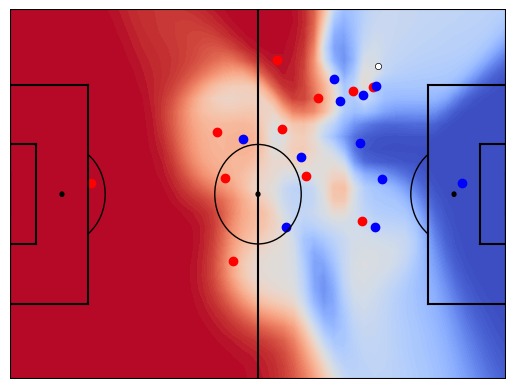

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotsoccer import field
from IPython.core.display import HTML

## use these parameters to set which frames you want to see
first_frame_to_plot = 0
n_frames_to_plot = 300


xx = np.linspace(0,105,n_grid_points_x)
yy = np.linspace(0,68,n_grid_points_y)

locs_ball_reduced = ball_pos[0,first_frame:(first_frame + n_frames),0,0,:]
locs_home_reduced = home_pos[:,first_frame:(first_frame + n_frames),0,0,:]
locs_away_reduced = away_pos[:,first_frame:(first_frame + n_frames),0,0,:]

fig, ax=plt.subplots()
field(ax=ax,show = False)
ax.set_xlim(0,105)
ax.set_ylim(0,68)
ball_points = ax.scatter(locs_ball_reduced[first_frame_to_plot,0],locs_ball_reduced[first_frame_to_plot,1],color = 'black',zorder = 15, s = 16)
ball_points2 = ax.scatter(locs_ball_reduced[first_frame_to_plot,0],locs_ball_reduced[first_frame_to_plot,1],color = 'white',zorder = 15, s = 9)
home_points = ax.scatter(locs_home_reduced[:,first_frame_to_plot,0],locs_home_reduced[:,first_frame_to_plot,1],color = 'red',zorder = 10)
away_points = ax.scatter(locs_away_reduced[:,first_frame_to_plot,0],locs_away_reduced[:,first_frame_to_plot,1],color = 'blue',zorder = 10)
p = [ax.contourf(xx,
                 yy,
                 pc[first_frame_to_plot].t().cpu(),
                 extent = (0,105,0,68),
                 levels = np.linspace(0,1,100),
                 cmap = 'coolwarm',
                 extend='both')]

def update(i):
    fr = i + first_frame_to_plot
    for tp in p[0].collections:
        tp.remove()
    p[0] = ax.contourf(xx,
                    yy,
                    pc[fr].t().cpu(),
                    extent = (0,105,0,68),
                    levels = np.linspace(0,1,100),
                    cmap = 'coolwarm',
                    extend='both')
    ball_points.set_offsets(np.c_[[locs_ball_reduced[i,0]],[locs_ball_reduced[i,1]]])
    ball_points2.set_offsets(np.c_[[locs_ball_reduced[i,0]],[locs_ball_reduced[i,1]]])
    home_points.set_offsets(np.c_[locs_home_reduced[:,i,0],locs_home_reduced[:,i,1]])
    away_points.set_offsets(np.c_[locs_away_reduced[:,i,0],locs_away_reduced[:,i,1]])
    return p[0].collections + [ball_points,home_points,away_points]

ani = matplotlib.animation.FuncAnimation(fig, update, frames=n_frames_to_plot,
                                         interval=40, blit=True, repeat=True)
HTML(ani.to_html5_video())

# Possession events

In [ ]:
events = df.dropna(subset=['possession_event'])

In [ ]:
events

,version,gameRefId,generatedTime,videoTimeMs,frameNum,period,periodElapsedTime,periodGameClockTime,homePlayers,homePlayersSmoothed,...,ballsSmoothed,sequence,home_ball,game_event_id,possession_event_id,game_event,possession_event,home_player_coordinates,away_player_coordinates,ball_coordinates
0,4.1.0,12501,2023-05-04T15:45:52.964339Z,3069.736,92,1,0.000000,0.000000,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...",...,"{'visibility': 'VISIBLE', 'x': -0.135, 'y': -1...",1.0,1.0,9544146.0,9510088.0,"{'game_id': 12501, 'game_event_type': '1KO', '...","{'game_id': 12501, 'game_event_id': 9544146, '...","{'Player10_x': -0.713, 'Player10_y': 9.342, 'P...","{'Player3_x': 4.924, 'Player3_y': -23.156, 'Pl...","{'Ball_x': -1.82, 'Ball_y': 1.29}"
64,4.1.0,12501,2023-05-04T15:45:52.964339Z,5205.205,156,1,2.135205,2.135205,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...",...,"{'visibility': 'VISIBLE', 'x': -14.386, 'y': 0...",1.0,1.0,9544231.0,9510169.0,"{'game_id': 12501, 'game_event_type': 'OTB', '...","{'game_id': 12501, 'game_event_id': 9544231, '...","{'Player10_x': 3.477, 'Player10_y': 10.031, 'P...","{'Player3_x': 6.156, 'Player3_y': -20.944, 'Pl...","{'Ball_x': -14.8, 'Ball_y': -0.42}"
128,4.1.0,12501,2023-05-04T15:45:52.964339Z,7340.674,220,1,4.270674,4.270674,"[{'jerseyNum': '10', 'confidence': 'LOW', 'vis...","[{'jerseyNum': '10', 'confidence': 'LOW', 'vis...",...,"{'visibility': 'VISIBLE', 'x': -21.292, 'y': -...",1.0,1.0,9544242.0,9510181.0,"{'game_id': 12501, 'game_event_type': 'OTB', '...","{'game_id': 12501, 'game_event_id': 9544242, '...","{'Player10_x': 7.46, 'Player10_y': 10.204, 'Pl...","{'Player3_x': 7.45, 'Player3_y': -19.775, 'Pla...","{'Ball_x': -19.91, 'Ball_y': -2.32}"
197,4.1.0,12501,2023-05-04T15:45:52.964339Z,9642.976,289,1,6.572976,6.572976,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...",...,"{'visibility': 'ESTIMATED', 'x': 13.99, 'y': 1...",2.0,0.0,9544253.0,9510192.0,"{'game_id': 12501, 'game_event_type': 'OTB', '...","{'game_id': 12501, 'game_event_id': 9544253, '...","{'Player10_x': 12.032, 'Player10_y': 11.425, '...","{'Player3_x': 14.376, 'Player3_y': -17.022, 'P...","{'Ball_x': 14.56, 'Ball_y': 8.92}"
264,4.1.0,12501,2023-05-04T15:45:52.964339Z,11878.545,356,1,8.808545,8.808545,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...",...,"{'visibility': 'ESTIMATED', 'x': 16.845, 'y': ...",3.0,1.0,9544265.0,9510209.0,"{'game_id': 12501, 'game_event_type': 'OTB', '...","{'game_id': 12501, 'game_event_id': 9544265, '...","{'Player10_x': 16.845, 'Player10_y': 16.887, '...","{'Player3_x': 21.688, 'Player3_y': -10.235, 'P...","{'Ball_x': 18.48, 'Ball_y': 16.46}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94725,4.1.0,12501,2023-05-04T15:45:52.964339Z,3163129.796,94799,1,3160.059796,3160.059796,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...",...,"{'visibility': 'VISIBLE', 'x': -24.13, 'y': -1...",179.0,1.0,9563829.0,9530146.0,"{'game_id': 12501, 'game_event_type': 'OTB', '...","{'game_id': 12501, 'game_event_id': 9563829, '...","{'Player10_x': -18.885, 'Player10_y': 7.85, 'P...","{'Player3_x': -19.44, 'Player3_y': -22.465, 'P...","{'Ball_x': -25.64, 'Ball_y': -13.96}"
94876,4.1.0,12501,2023-05-04T15:45:52.964339Z,3168168.168,94950,1,3165.098168,3165.098168,"[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...","[{'jerseyNum': '10', 'confidence': 'HIGH', 'vi...",...,"{'visibility': 'VISIBLE', 'x': -7.246, 'y': -1...",179.0,1.0,9563849.0,9530165.0,"{'game_id': 12501, 'game_event_type': 'OTB', '...","{'game_id': 12501, 'game_event_id': 9563849, '...","{'Player10_x': 7.037, 'Player10_y': 2.357, 'Pl...","{'Player3_x': 0.551, 'Player3_y': -15.273, 'Pl...","{'Ball_x': -2.96, 'Ball_y': -14.5}"
95051,4.1.0,12501,2

In [ ]:
events.game_event.iloc[1]

{'game_id': 12501,
 'game_event_type': 'OTB',
 'competition_id': 42,
 'season': 2023,
 'formatted_game_clock': '00:00',
 'player_id': 16021.0,
 'shirt_number': 29.0,
 'position_group_type': 'CM',
 'team_id': 432.0,
 'home_team': True,
 'setpiece_type': None,
 'touches': None,
 'touches_in_box': None,
 'start_time': 4.037,
 'end_time': 5.205,
 'duration': 1.168,
 'video_missing': False,
 'inserted_at': '2023-04-27 03:20:37',
 'updated_at': '2023-04-28 01:33:15',
 'start_frame': 121,
 'end_frame': 156}